In [44]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("Ads_Clicks.csv")

In [46]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Qa) MAB Problem formulation

- State Space (S):
    - Each ad corresponds to a distinct arm.
    - The state represents the choice of an ad (arm) at each time step.
- Action Space (A):
    - The action space consists of the 10 ads (arms).
    - At each time step, the agent selects an ad to display.
- Reward Function (R):
    - The reward function assigns a reward (1 for clicked, 0 for not clicked) based on the user’s interaction with the displayed ad.
    - R(S) represents the reward for selecting ad S which is either 0 or 1.
- Model (T):
    - The transition model describes how the chosen ad affects the outcome (click or no click). Since the user’s behavior is uncertain, the transition model is stochastic.
- Policy (π):
    - The policy maps states (ads) to actions (displaying ads).
    - The objective is to find an optimal policy (epsilon greedy or UCB) that maximizes the cumulative reward over time.

## Qb) Epsilon greedy for epsilon = 0.01 and 0.3

In [47]:
class EpsilonGreedy:
    def __init__(self, epsilon: float) -> None:
        self.values = [0 for _ in range(10)]
        self.iterations = 0
        self.epsilon = epsilon
        self.cumulative = []

    def update(self, xs: list[int]):
        is_greedy = random.choices([False, True], [self.epsilon, 1 - self.epsilon])[0]

        arm = self.best_arm() if is_greedy else self.random_arm()
        reward = xs[arm]

        self.iterations += 1
        self.values[arm] += reward
        self.cumulative.append(reward)

    def best_arm(self) -> int:
        return np.argmax(self.values)

    def random_arm(self) -> int:
        return random.randint(0, 9)

    def get_result(self) -> list[int]:
        return self.values

In [48]:
eg1 = EpsilonGreedy(0.01)

counter = 0
for xs in df.values:
    counter += 1

    eg1.update(xs)
    if counter > 2000:
        break

print(f"Per action: {eg1.get_result()}")
print(f"Total: {sum(eg1.get_result())}")

Per action: [341, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Total: 342


In [49]:
eg2 = EpsilonGreedy(0.3)

counter = 0
for xs in df.values:
    counter +=1

    eg2.update(xs)
    if counter > 2000:
        break

print(f"Per action: {eg2.get_result()}")
print(f"Total: {sum(eg2.get_result())}")

Per action: [263, 8, 3, 8, 15, 0, 7, 16, 4, 3]
Total: 327


## Qc) UCB for confidence = 1.5

In [50]:
class UCB:
    def __init__(self, c: float) -> None:
        self.values = np.zeros(10)
        self.iterations = 0
        self.actions = np.ones(10)
        self.c = c
        self.cumulative = []

    def update(self, xs: list[int]):
        arm = self.get_arm()
        reward = xs[arm]

        self.actions[arm] += 1
        self.iterations += 1

        self.values[arm] += reward
        self.cumulative.append(reward)

    def get_arm(self) -> int:
        arm = np.argmax(self.values + self.c * np.sqrt(np.log(self.iterations + 1) / self.actions))
        return arm

    def get_result(self) -> list[int]:
        return np.int64(self.values)

In [51]:
ucb = UCB(1.5)

counter = 0
for xs in df.values:
    counter +=1

    ucb.update(xs)
    if counter > 2000:
        break

print(f"Per action: {ucb.get_result()}")
print(f"Total: {sum(ucb.get_result())}")

Per action: [  1   0   0   1   0   1   0 413   1   0]
Total: 417


## Qd) Comparison to optimal

In [63]:
# Optimal arm
df.iloc[0:2000,:].sum().idxmax()

'Ad 5'

In [64]:
# Optimal reward
optimal = df.iloc[0:2000,:].sum().max()
optimal

542

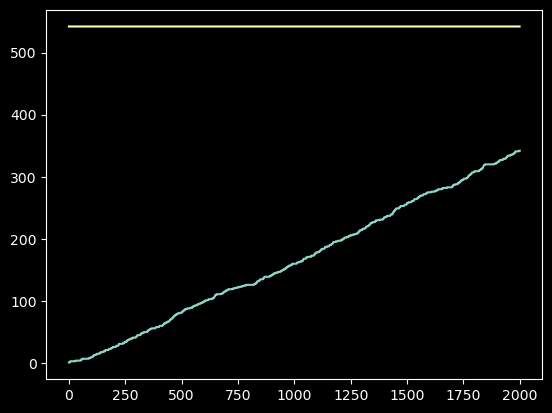

In [65]:
plt.plot(np.cumsum(eg1.cumulative))
plt.plot([optimal for _ in range(2000)])

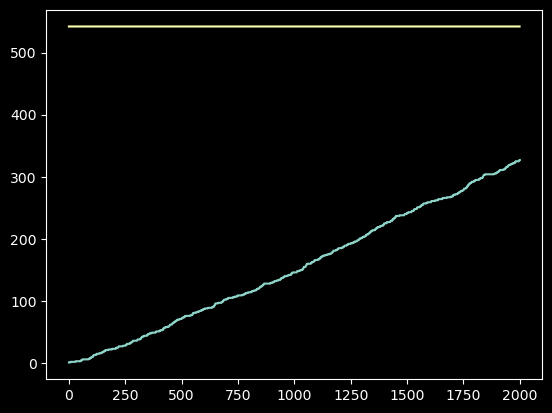

In [66]:
plt.plot(np.cumsum(eg2.cumulative))
plt.plot([optimal for _ in range(2000)])

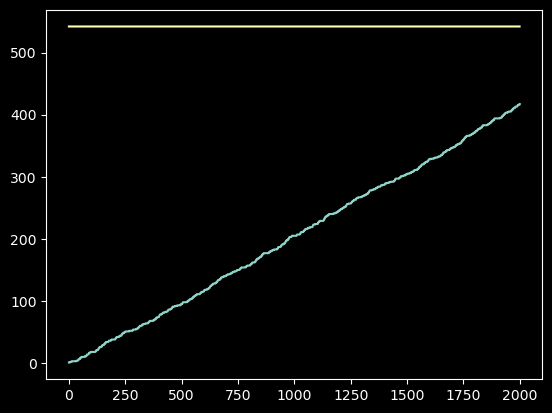

In [67]:
plt.plot(np.cumsum(ucb.cumulative))
plt.plot([optimal for _ in range(2000)])

We see that none of the policies have achieved to reach the optimal reward possible and that UCB has a better cumulative reward - a steeper slope than epsilon greedy policy.